# 5.4.1 Bootstrapping

## Explanation of Bootstrapping

Bootstrapping is a resampling technique used to estimate the distribution of a statistic by sampling with replacement from the original dataset. This method allows for the estimation of the sampling distribution of almost any statistic, such as mean, variance, or correlation, by generating multiple resampled datasets (called bootstrap samples) and calculating the desired statistic for each sample.

## Confidence Intervals

A confidence interval is a range of values that is likely to contain a population parameter with a certain level of confidence. In the context of bootstrapping, confidence intervals can be constructed by taking the percentiles of the bootstrap distribution. For example, a 95% confidence interval for a statistic can be obtained by taking the 2.5th percentile and the 97.5th percentile of the bootstrap distribution.

The formula for the confidence interval is:

$$
CI = \left( \text{lower percentile}, \text{upper percentile} \right)
$$

For a 95% confidence interval, this is typically:

$$
CI_{95\%} = \left( \text{percentile}_{2.5\%}, \text{percentile}_{97.5\%} \right)
$$


### Explanation of the Formulas

- **Confidence Level (\(\alpha\))**: This sets the confidence level to 95%. It means we are 95% confident that the interval contains the true population parameter. Mathematically, $\alpha = 0.95$.
- **Percentile Calculation for Lower Bound**: The lower bound percentile is calculated using $$\left(\frac{1 - \alpha}{2}\right) \times 100$$ For a 95% confidence interval, this is $$\left(\frac{1 - 0.95}{2}\right) \times 100 = 2.5\%$$
- **Lower Bound of Confidence Interval**: The lower bound is found by determining the value below which 2.5% of the bootstrap sample statistics fall. If $ S $ is the sorted array of bootstrap sample statistics, the lower bound is $ S_{\text{2.5th percentile}} $.
- **Upper Bound of Confidence Interval**: The upper bound is found by determining the value below which 97.5% of the bootstrap sample statistics fall. This is calculated as $ 100\% - 2.5\% = 97.5\% $. Thus, the upper bound is $ S_{\text{97.5th percentile}} $.


___
___

### Readings:
- [A Gentle Introduction to the Bootstrap Method](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/)
- [How to test machine learning models using bootstrapping](https://thinkingneuron.com/how-to-test-machine-learning-models-using-bootstrapping/)
___
___

## Benefits of Bootstrapping

1. **No Assumptions Required**: Unlike parametric methods, bootstrapping does not require any assumptions about the underlying distribution of the data.
2. **Versatility**: Bootstrapping can be used for various statistics and models, including those that are difficult to analyze using traditional methods.
3. **Robustness**: It provides robust estimates of standard errors, confidence intervals, and other statistical measures, especially when the sample size is small or the data distribution is unknown.
4. **Computationally Feasible**: With the advent of powerful computers, bootstrapping has become a practical approach for many statistical problems.

## Scenarios for Using Bootstrapping

1. **Small Sample Sizes**: When the sample size is small and traditional methods are unreliable, bootstrapping provides a more accurate estimation of the statistic's distribution.
2. **Unknown Distribution**: When the underlying distribution of the data is unknown or complex, bootstrapping can be used to make inferences without making assumptions about the data distribution.
3. **Complex Statistics**: For statistics or models that do not have straightforward analytical solutions, bootstrapping can be used to estimate confidence intervals and standard errors.

## Implementing Bootstrapping

Bootstrapping involves the following steps:

1. Randomly sample with replacement from the original dataset to create a bootstrap sample.
2. Calculate the statistic of interest for the bootstrap sample.
3. Repeat steps 1 and 2 many times (typically 1000 or more iterations) to generate a distribution of the statistic.
4. Use the distribution of the statistic to estimate confidence intervals, standard errors, or other measures of interest.

___
### Bootstrapping for mean of data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [2]:
# Load a dataset (e.g., California housing dataset)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
# Define the statistic to be calculated (e.g., mean)
def calculate_statistic(data, target):
    return np.mean(target)

In [4]:
# Number of bootstrap samples
n_iterations = 1000
n_size = len(X)

# Run bootstrapping
stats = []
for i in range(n_iterations):
    X_resampled, y_resampled = resample(X, y, n_samples=n_size, replace=True)
    stat = calculate_statistic(X_resampled, y_resampled)
    stats.append(stat)

In [5]:
# Calculate confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = np.percentile(stats, p)
upper = np.percentile(stats, 100-p)
print(f'{alpha*100:.1f}% confidence interval for the mean: {lower:.2f} to {upper:.2f}')

95.0% confidence interval for the mean: 2.05 to 2.08


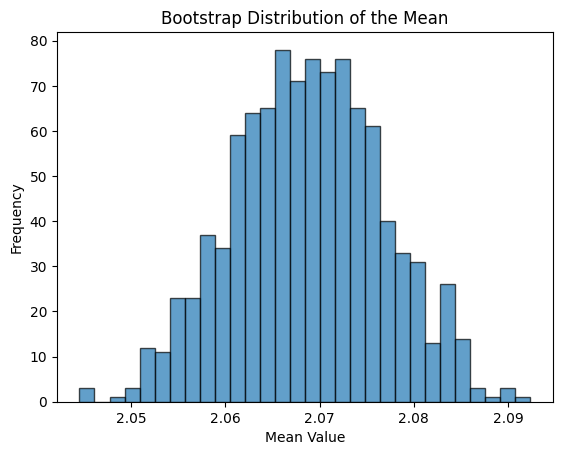

In [6]:
# Plot the distribution of bootstrap samples
plt.hist(stats, bins=30, edgecolor='k', alpha=0.7)
plt.title('Bootstrap Distribution of the Mean')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.show()

___
### Bootstrapping in context of Model Validation


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [8]:
# Load a dataset (e.g., California housing dataset)
data = fetch_california_housing()
X, y = data.data, data.target

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = LinearRegression()

In [10]:
# Number of bootstrap samples
n_iterations = 1000
n_size = len(X_train)

# Run bootstrapping
mse_scores = []
for i in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_size, replace=True)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

In [11]:
# Calculate confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = np.percentile(mse_scores, p)
upper = np.percentile(mse_scores, 100-p)
print(f'{alpha*100:.1f}% confidence interval for the MSE: {lower:.2f} to {upper:.2f}')

95.0% confidence interval for the MSE: 0.52 to 0.54


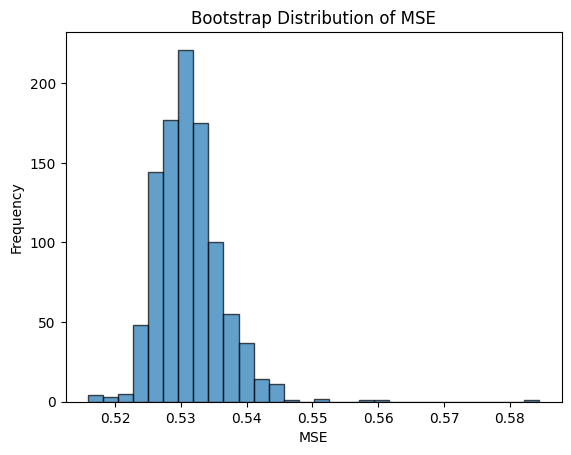

In [12]:
# Plot the distribution of bootstrap MSE scores
plt.hist(mse_scores, bins=30, edgecolor='k', alpha=0.7)
plt.title('Bootstrap Distribution of MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.show()

## Conclusion

Bootstrapping is a powerful and versatile resampling technique that provides robust estimates of statistical measures without making assumptions about the underlying data distribution. It is particularly useful for small sample sizes, unknown distributions, and complex statistics. By generating multiple resampled datasets and calculating the desired statistic for each sample, bootstrapping allows for the estimation of confidence intervals, standard errors, and other measures of interest, making it a valuable tool in the field of statistics and data analysis.

### Interpretation of the Result

The result of the bootstrapping procedure provides a 95% confidence interval for the mean squared error (MSE) of the linear regression model on the test set. The interval gives a range of values within which we can be 95% confident that the true MSE of the model lies. For example, if the 95% confidence interval for the MSE is (0.50, 0.70), it means that we are 95% confident that the true MSE of the model on unseen data lies between 0.50 and 0.70. This provides a measure of the precision of our estimate and the reliability of our inference about the model's performance based on the sample data.
